Cleaned column names: ['Name', 'Tickets Bought', 'Ticket Price', 'Probability of Winning']

 Result for Vivaan Sharma:
- bernoulli mean = 0.0112 and bernoulli variance=0.0111
- binomial mean = 0.1012 and binomial variance = 0.1000
- uniform mean = 49.50 and uniform variance = 816.75
- normal mean = 0.1012 and normal variance = 0.1000

 Result for Vivaan Rao:
- bernoulli mean = 0.0211 and bernoulli variance=0.0207
- binomial mean = 0.0634 and binomial variance = 0.0621
- uniform mean = 12.00 and uniform variance = 48.00
- normal mean = 0.0634 and normal variance = 0.0621

 Result for Aarav Verma:
- bernoulli mean = 0.0253 and bernoulli variance=0.0247
- binomial mean = 0.1772 and binomial variance = 0.1728
- uniform mean = 24.50 and uniform variance = 200.08
- normal mean = 0.1772 and normal variance = 0.1728

 Result for Aarav Rao:
- bernoulli mean = 0.0325 and bernoulli variance=0.0315
- binomial mean = 0.2277 and binomial variance = 0.2203
- uniform mean = 24.50 and uniform variance 

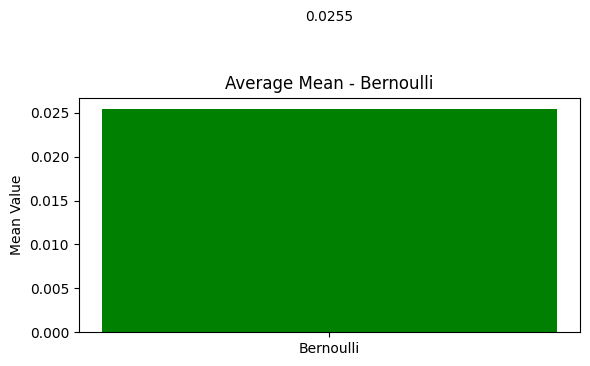

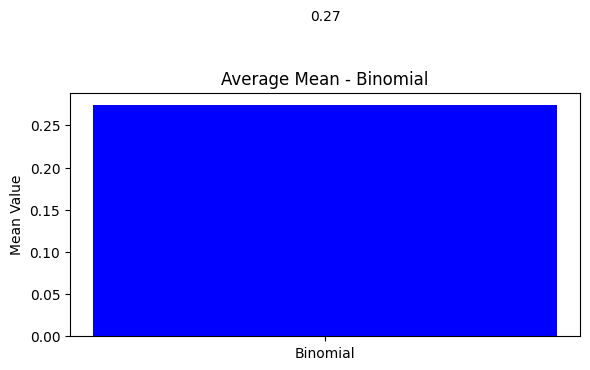

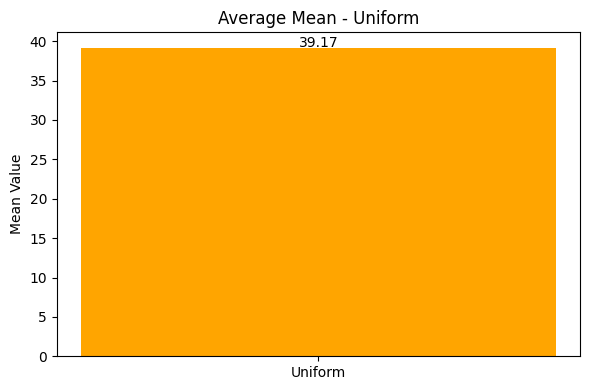

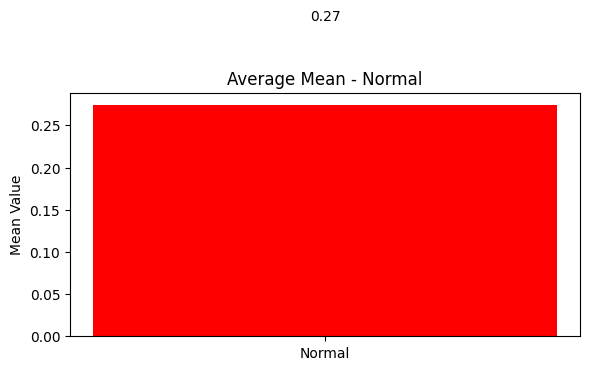

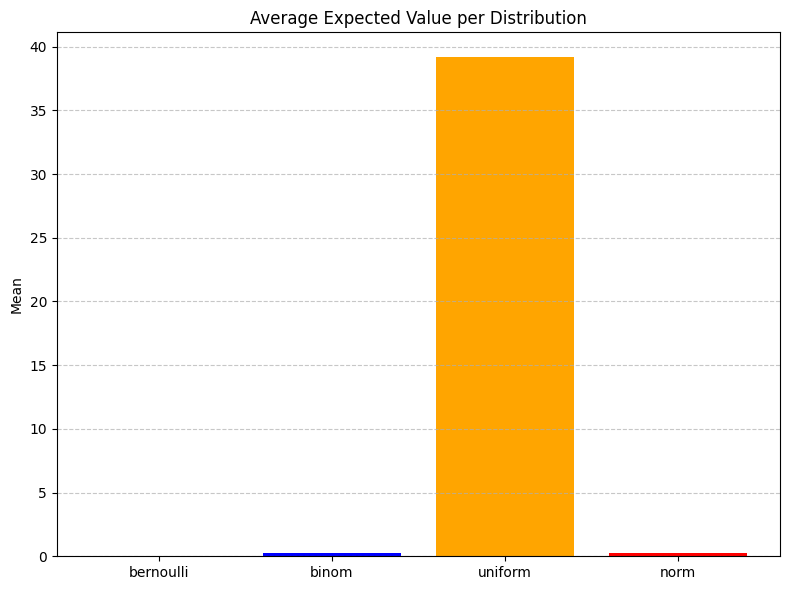

In [53]:
import numpy as np
from  scipy.stats import bernoulli,binom,uniform,norm
import matplotlib.pyplot as plt
import pandas as pd
import math

file_path="lottery_data.csv"

def bernoulli(p):
    mean=p
    varian=p*(1-p)
    return mean,varian
def binom(n,p):
    mean=n*p
    varian=n*p*(1-p)
    return mean,varian
def uniform(a,b):
    mean=(a+b)/2
    varian=((b-a)**2)/12
    return mean,varian
def norm(mu,sigma):
    mean=mu
    varian=sigma**2
    return mean,varian


bernoulli_mean=[]
binomial_mean=[]
uniform_mean=[]
normal_mean=[]

with open(file_path,"r",encoding='utf-8-sig') as file:
    read=pd.read_csv(file)
    read.columns = read.columns.str.strip()  # its remove the whitespaces
    print("Cleaned column names:", read.columns.tolist()) 
    for index,i in read.iterrows():
        name=i["Name"]
        no_ticket=int(i["Tickets Bought"])
        price=float(i["Ticket Price"])
        prob=float(i["Probability of Winning"])
    
        print(f"\n Result for {name}:")

        berno_mean,berno_var=bernoulli(prob)
        bernoulli_mean.append(berno_mean)
        print(f"- bernoulli mean = {berno_mean:.4f} and bernoulli variance={berno_var:.4f}")


        bino_mean,bino_var=binom(no_ticket,prob)
        binomial_mean.append(bino_mean)
        print(f"- binomial mean = {bino_mean:.4f} and binomial variance = {bino_var:.4f}")



        uni_mean,uni_var=uniform(0,no_ticket*price)  # a=0 - starting interval , b= no.of tiket * price (ending interval)
        uniform_mean.append(uni_mean)
        print(f"- uniform mean = {uni_mean:.2f} and uniform variance = {uni_var:.2f}")



        nor_mean,nor_var=norm(bino_mean,math.sqrt(bino_var))
        normal_mean.append(nor_mean)
        print(f"- normal mean = {nor_mean:.4f} and normal variance = {nor_var:.4f}")

avg_bernoulli=sum(bernoulli_mean)/len(bernoulli_mean)
avg_binomial=sum(binomial_mean)/len(binomial_mean)
avg_uniform=sum(uniform_mean)/len(uniform_mean)
avg_normal=sum(normal_mean)/len(normal_mean)
overall_avg=(avg_bernoulli+avg_binomial+avg_normal+avg_uniform)/4



# Bernoulli Average

plt.figure(figsize=(6, 4))
plt.bar(["Bernoulli"], [avg_bernoulli], color='green')
plt.title("Average Mean - Bernoulli")
plt.ylabel("Mean Value")
plt.text(0, avg_bernoulli + 0.01, f"{avg_bernoulli:.4f}", ha='center')
plt.tight_layout()
plt.show()


# Binomial Average
plt.figure(figsize=(6, 4))
plt.bar(["Binomial"], [avg_binomial], color='blue')
plt.title("Average Mean - Binomial")
plt.ylabel("Mean Value")
plt.text(0, avg_binomial + 0.1, f"{avg_binomial:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Uniform Average
plt.figure(figsize=(6, 4))
plt.bar(["Uniform"], [avg_uniform], color='orange')
plt.title("Average Mean - Uniform")
plt.ylabel("Mean Value")
plt.text(0, avg_uniform + 0.1, f"{avg_uniform:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Normal Average
plt.figure(figsize=(6, 4))
plt.bar(["Normal"], [avg_normal], color='red')
plt.title("Average Mean - Normal")
plt.ylabel("Mean Value")

plt.text(0, avg_normal + 0.1, f"{avg_normal:.2f}", ha='center')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.bar(["bernoulli","binom","uniform","norm"],[avg_bernoulli,avg_binomial,avg_uniform,avg_normal], color=["green","blue","orange","red"])
plt.title('Average Expected Value per Distribution')
plt.ylabel('Mean')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


